# Analysis of climate trends and changes through multidimensional data

## Import libraries

In [1]:
import arcpy
from arcpy.ia import*
from arcgis.gis import GIS

## Login ArcGIS online

In [2]:
# Prompt user to provide username and password
import getpass
username = input('Enter username: ')
password = getpass.getpass("Enter your password: ") 
gis = GIS("https://udistritalfjc.maps.arcgis.com/home", username, password)

Enter username: camendezv_UDFJC
Enter your password: ········


## Import the precipitation and temperature data

In [3]:
# precipitation
prcp_CanESM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\CCCma-CanESM2_prcp.crf", True)
prcp_HadGEM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\MOHC-HadGEM2-ES_prcp.crf", True)
prcp_MIROC5 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\MIROC-MIROC5_prcp.crf", True)
# temperature
tas_CanESM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\CCCma-CanESM2_tas.crf", True)
tas_HadGEM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\MOHC-HadGEM2-ES_tas.crf", True)
tas_MIROC5 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\MIROC-MIROC5_tas.crf", True)

### Check the basic statistics

In [4]:
print(prcp_CanESM2.name,'\n', prcp_CanESM2.getStatistics('pr'),'\n')
print(prcp_HadGEM2.name,'\n', prcp_HadGEM2.getStatistics('pr'),'\n')
print(prcp_MIROC5.name,'\n', prcp_MIROC5.getStatistics('pr'),'\n')
print(tas_CanESM2.name,'\n', tas_CanESM2.getStatistics('tas'),'\n')
print(tas_HadGEM2.name,'\n', tas_HadGEM2.getStatistics('tas'),'\n')
print(tas_MIROC5.name,'\n', tas_MIROC5.getStatistics('tas'),'\n')

CCCma-CanESM2_prcp.crf 
 [{'min': 0.0, 'max': 3704.265380859375, 'mean': 72.59886479097752, 'standardDeviation': 112.25821603106093, 'sum': 1206157539.6373005, 'median': 0.0, 'mode': 0.0, 'skipX': 1, 'skipY': 1, 'count': 16614000.0}] 

MOHC-HadGEM2-ES_prcp.crf 
 [{'min': 0.0, 'max': 3319.35986328125, 'mean': 67.65189240010257, 'standardDeviation': 91.35360033376782, 'sum': 1123968540.335304, 'median': 13.017097503063725, 'mode': 0.0, 'skipX': 1, 'skipY': 1, 'count': 16614000.0}] 

MIROC-MIROC5_prcp.crf 
 [{'min': 0.0, 'max': 10741.5732421875, 'mean': 131.39265274839272, 'standardDeviation': 207.99609311313364, 'sum': 2182957532.7617965, 'median': 42.12381663602941, 'mode': 0.0, 'skipX': 1, 'skipY': 1, 'count': 16614000.0}] 

CCCma-CanESM2_tas.crf 
 [{'min': -17.417929077148415, 'max': 37.40117797851565, 'mean': 21.50182462731987, 'standardDeviation': 7.2775721559695326, 'sum': 357231314.35829234, 'median': 23.2127032111673, 'mode': 26.437356567382835, 'skipX': 1, 'skipY': 1, 'count': 1

## Display precipitation and temperature data

### Precipitation

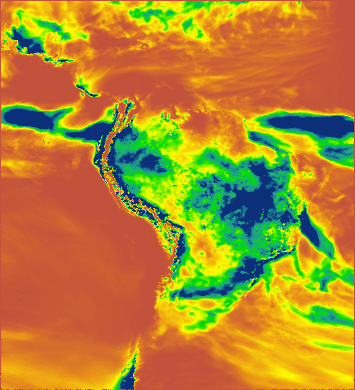

In [5]:
# CCCma-CanESM2
prcp_CCCma_CanESM2_render = Render(prcp_CanESM2, rendering_rule={'min':0, 'max':3704.265380859375, 'numberOfStandardDeviations':2, 'DRA':True}, colormap="Precipitation")
prcp_CCCma_CanESM2_render

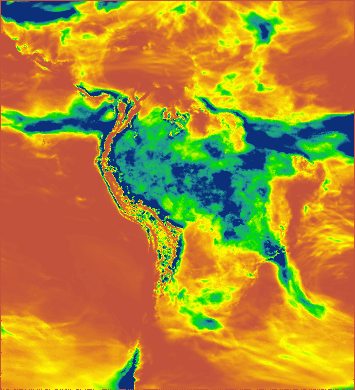

In [6]:
# MOHC-HadGEM2-ES
prcp_MOHC_HadGEM2_ES_render = Render(prcp_HadGEM2, rendering_rule={'min':0, 'max':3319.35986328125, 'numberOfStandardDeviations':2, 'DRA':True}, colormap="Precipitation")
prcp_MOHC_HadGEM2_ES_render

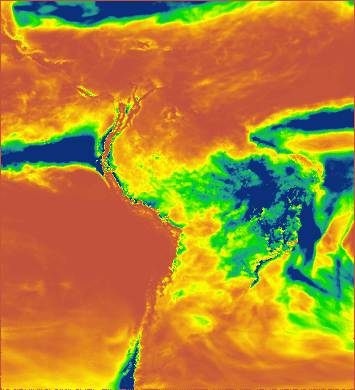

In [7]:
# MIROC-MIROC5
prcp_MIROC_MIROC5_render = Render(prcp_MIROC5, rendering_rule={'min':0, 'max':10741.5732421875, 'numberOfStandardDeviations':2, 'DRA':True}, colormap="Precipitation")
prcp_MIROC_MIROC5_render

### Temperature

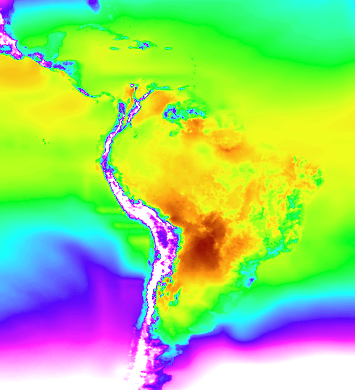

In [8]:
# CCCma-CanESM2
tas_CCCma_CanESM2_render = Render(tas_CanESM2, rendering_rule={'min':-17.417929077148415, 'max': 37.40117797851565, 'numberOfStandardDeviations':2, 'DRA':True}, colormap="Temperature")
tas_CCCma_CanESM2_render

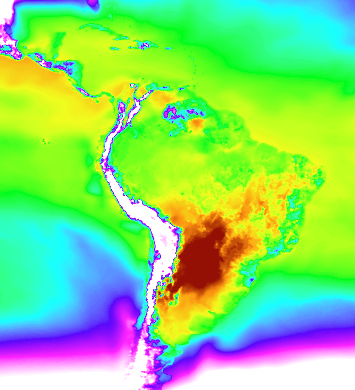

In [9]:
# MOHC-HadGEM2-ES
tas_MOHC_HadGEM2_ES_render = Render(tas_HadGEM2, rendering_rule={'min': -20.240515136718727, 'max': 34.98125610351565, 'numberOfStandardDeviations':2, 'DRA':True}, colormap="Temperature")
tas_MOHC_HadGEM2_ES_render

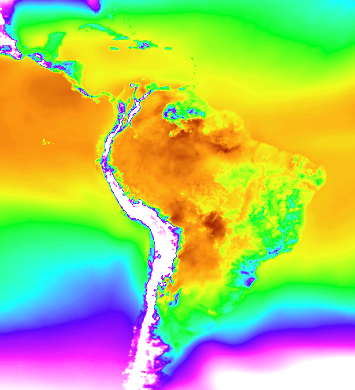

In [10]:
# MIROC-MIROC5
tas_MIROC_MIROC5_render = Render(tas_MIROC5, rendering_rule={'min': -21.64348449707029, 'max': 32.02727661132815, 'numberOfStandardDeviations':2, 'DRA':True}, colormap="Temperature")
tas_MIROC_MIROC5_render

## Generate Multidimensional Anomaly

In [11]:
data_path_precipitation = r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation"
data_path_temperature = r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature"

### Precipitation

In [12]:
# CCCma-CanESM2
with arcpy.EnvManager(scratchWorkspace=data_path_precipitation):
    out_multidimensional_raster = arcpy.ia.GenerateMultidimensionalAnomaly( in_multidimensional_raster = prcp_CanESM2,
                                                                            variables="pr", method="DIFFERENCE_FROM_MEAN", calculation_interval="ALL", 
                                                                            ignore_nodata="DATA",reference_mean_raster=None)
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\CCCma-CanESM2_prcp_anomaly.crf")

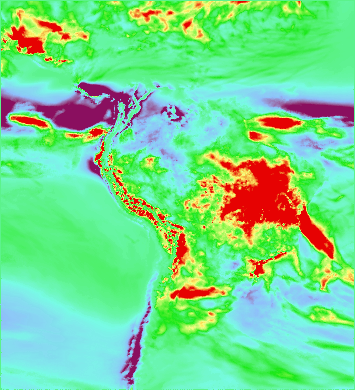

In [20]:
anom_prcp_CanESM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\CCCma-CanESM2_prcp_anomaly.crf", True)
anom_prcp_CCCma_CanESM2_render = Render(anom_prcp_CanESM2, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Bathymetric Scale")
anom_prcp_CCCma_CanESM2_render

In [21]:
# MOHC-HadGEM2-ES
with arcpy.EnvManager(scratchWorkspace=data_path_precipitation):
    out_multidimensional_raster = arcpy.ia.GenerateMultidimensionalAnomaly( in_multidimensional_raster = prcp_HadGEM2,
                                                                            variables="pr", method="DIFFERENCE_FROM_MEAN", calculation_interval="ALL", 
                                                                            ignore_nodata="DATA",reference_mean_raster=None)
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\MOHC-HadGEM2-ES_prcp_anomaly.crf")

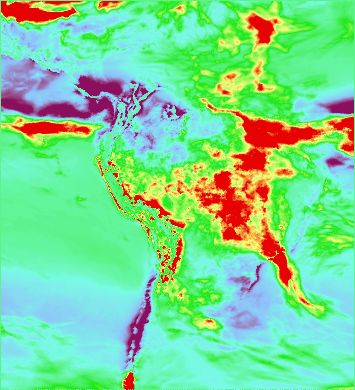

In [22]:
anom_prcp_HadGEM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\MOHC-HadGEM2-ES_prcp_anomaly.crf", True)
anom_prcp_MOHC_HadGEM2_ES_render = Render(anom_prcp_HadGEM2, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Bathymetric Scale")
anom_prcp_MOHC_HadGEM2_ES_render

In [23]:
# MIROC-MIROC5
with arcpy.EnvManager(scratchWorkspace=data_path_precipitation):
    out_multidimensional_raster = arcpy.ia.GenerateMultidimensionalAnomaly( in_multidimensional_raster = prcp_MIROC5,
                                                                            variables="pr", method="DIFFERENCE_FROM_MEAN", calculation_interval="ALL", 
                                                                            ignore_nodata="DATA",reference_mean_raster=None)
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\MIROC-MIROC5_prcp_anomaly.crf")

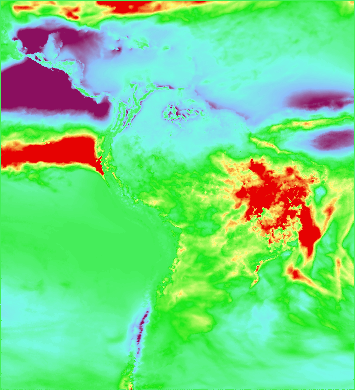

In [25]:
anom_prcp_MIROC5 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\MIROC-MIROC5_prcp_anomaly.crf", True)
anom_prcp_MIROC_MIROC5_render = Render(anom_prcp_MIROC5, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Bathymetric Scale")
anom_prcp_MIROC_MIROC5_render

### Temperature

In [26]:
# CCCma-CanESM2
with arcpy.EnvManager(scratchWorkspace=data_path_temperature):
    out_multidimensional_raster = arcpy.ia.GenerateMultidimensionalAnomaly( in_multidimensional_raster = tas_CanESM2,
                                                                            variables="tas", method="DIFFERENCE_FROM_MEAN", calculation_interval="ALL", 
                                                                            ignore_nodata="DATA",reference_mean_raster=None)
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\CCCma-CanESM2_tas_anomaly.crf")

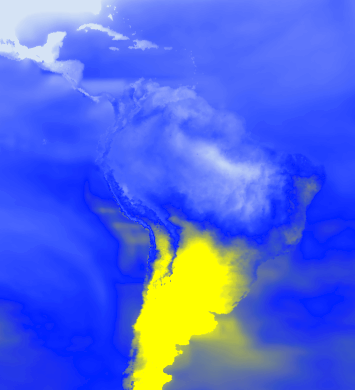

In [27]:
anom_tas_CanESM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\CCCma-CanESM2_tas_anomaly.crf", True)
anom_tas_CCCma_CanESM2_render = Render(anom_tas_CanESM2, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Heat Map 3")
anom_tas_CCCma_CanESM2_render

In [29]:
# MOHC-HadGEM2-ES
with arcpy.EnvManager(scratchWorkspace=data_path_temperature):
    out_multidimensional_raster = arcpy.ia.GenerateMultidimensionalAnomaly( in_multidimensional_raster = tas_HadGEM2,
                                                                            variables="tas", method="DIFFERENCE_FROM_MEAN", calculation_interval="ALL", 
                                                                            ignore_nodata="DATA",reference_mean_raster=None)
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\MOHC-HadGEM2-ES_tas_anomaly.crf")

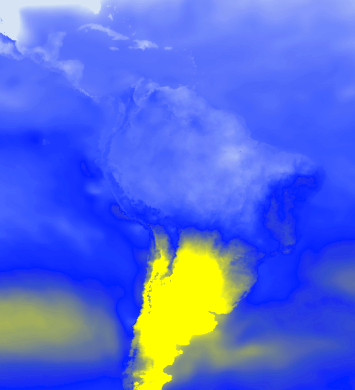

In [31]:
anom_tas_HadGEM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\MOHC-HadGEM2-ES_tas_anomaly.crf", True)
anom_tas_MOHC_HadGEM2_ES_render = Render(anom_tas_HadGEM2, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Heat Map 3")
anom_tas_MOHC_HadGEM2_ES_render

In [32]:
# MIROC-MIROC5
with arcpy.EnvManager(scratchWorkspace=data_path_temperature):
    out_multidimensional_raster = arcpy.ia.GenerateMultidimensionalAnomaly( in_multidimensional_raster = tas_MIROC5,
                                                                            variables="tas", method="DIFFERENCE_FROM_MEAN", calculation_interval="ALL", 
                                                                            ignore_nodata="DATA",reference_mean_raster=None)
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\MIROC-MIROC5_tas_anomaly.crf")

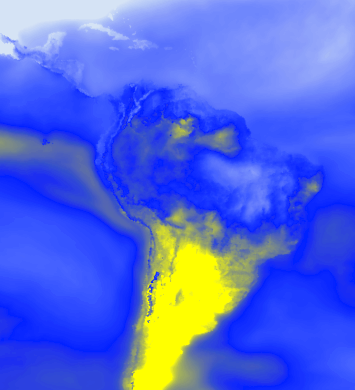

In [33]:
anom_tas_MIROC5 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\MIROC-MIROC5_tas_anomaly.crf", True)
anom_tas_MIROC_MIROC5_render = Render(anom_tas_MIROC5, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Heat Map 3")
anom_tas_MIROC_MIROC5_render

## Generate Trend Raster

### Precipitation

In [34]:
# CCCma-CanESM2
with arcpy.EnvManager(scratchWorkspace=data_path_precipitation):
    out_multidimensional_raster = arcpy.ia.GenerateTrendRaster(
        in_multidimensional_raster = prcp_CanESM2, 
        dimension="StdTime", variables="pr", line_type="HARMONIC", frequency=1, ignore_nodata="DATA",
        cycle_length=30, cycle_unit="DAYS", rmse="RMSE", r2="R2", slope_p_value="NO_SLOPEPVALUE",
        seasonal_period="")
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\CCCma-CanESM2_prcp_GenerateTrend.crf")

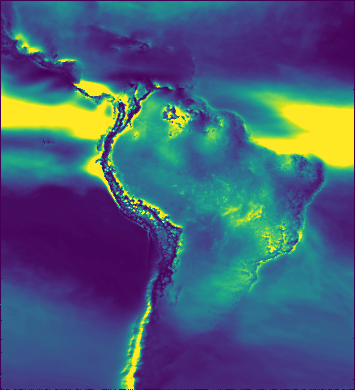

In [47]:
trend_prcp_CanESM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\CCCma-CanESM2_prcp_GenerateTrend.crf", True)
#display the slope band
trend_prcp_CanESM2_band = ExtractBand(trend_prcp_CanESM2, band_ids = [5])
trend_prcp_CanESM2_render = Render(trend_prcp_CanESM2_band, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Viridis")
trend_prcp_CanESM2_render

In [48]:
# MOHC-HadGEM2-ES
with arcpy.EnvManager(scratchWorkspace=data_path_precipitation):
    out_multidimensional_raster = arcpy.ia.GenerateTrendRaster(
        in_multidimensional_raster = prcp_HadGEM2, 
        dimension="StdTime", variables="pr", line_type="HARMONIC", frequency=1, ignore_nodata="DATA",
        cycle_length=30, cycle_unit="DAYS", rmse="RMSE", r2="R2", slope_p_value="NO_SLOPEPVALUE",
        seasonal_period="")
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\MOHC-HadGEM2-ES_prcp_GenerateTrend.crf")

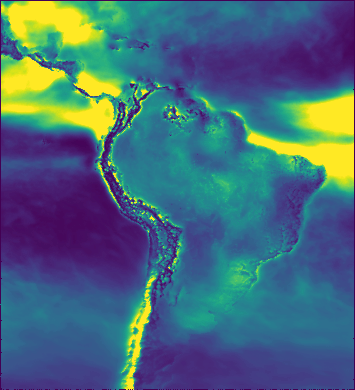

In [49]:
trend_prcp_HadGEM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\MOHC-HadGEM2-ES_prcp_GenerateTrend.crf", True)
#display the slope band
trend_prcp_HadGEM2_band = ExtractBand(trend_prcp_HadGEM2, band_ids = [5])
trend_prcp_HadGEM2_render = Render(trend_prcp_HadGEM2_band, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Viridis")
trend_prcp_HadGEM2_render

In [50]:
# MIROC-MIROC5
with arcpy.EnvManager(scratchWorkspace=data_path_precipitation):
    out_multidimensional_raster = arcpy.ia.GenerateTrendRaster(
        in_multidimensional_raster = prcp_MIROC5, 
        dimension="StdTime", variables="pr", line_type="HARMONIC", frequency=1, ignore_nodata="DATA",
        cycle_length=30, cycle_unit="DAYS", rmse="RMSE", r2="R2", slope_p_value="NO_SLOPEPVALUE",
        seasonal_period="")
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\MIROC-MIROC5_prcp_GenerateTrend.crf")

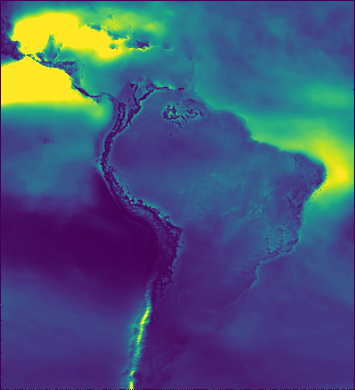

In [51]:
trend_prcp_MIROC5 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\MIROC-MIROC5_prcp_GenerateTrend.crf", True)
#display the slope band
trend_prcp_MIROC5_band = ExtractBand(trend_prcp_MIROC5, band_ids = [5])
trend_prcp_MIROC5_render = Render(trend_prcp_MIROC5_band, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Viridis")
trend_prcp_MIROC5_render

### Temperature

In [52]:
# CCCma-CanESM2
with arcpy.EnvManager(scratchWorkspace=data_path_temperature):
    out_multidimensional_raster = arcpy.ia.GenerateTrendRaster(
        in_multidimensional_raster=tas_CanESM2,
        dimension="StdTime", variables="tas", line_type="HARMONIC", frequency=1, ignore_nodata="DATA", 
        cycle_length=30, cycle_unit="DAYS", rmse="RMSE", r2="R2", slope_p_value="NO_SLOPEPVALUE", 
        seasonal_period="")
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\CCCma-CanESM2_tas_GenerateTrend.crf")

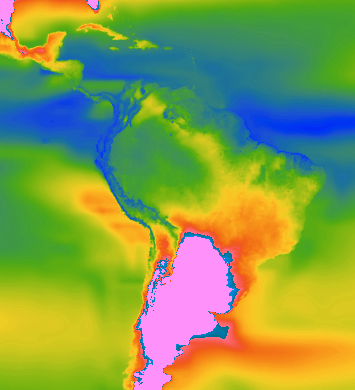

In [53]:
trend_tas_CanESM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\CCCma-CanESM2_tas_GenerateTrend.crf", True)
#display the slope band
trend_tas_CanESM2_band = ExtractBand(trend_tas_CanESM2, band_ids = [5])
trend_tas_CanESM2_render = Render(trend_tas_CanESM2_band, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Voxel Sequential")
trend_tas_CanESM2_render

In [54]:
# MOHC-HadGEM2-ES
with arcpy.EnvManager(scratchWorkspace=data_path_temperature):
    out_multidimensional_raster = arcpy.ia.GenerateTrendRaster(
        in_multidimensional_raster=tas_HadGEM2,
        dimension="StdTime", variables="tas", line_type="HARMONIC", frequency=1, ignore_nodata="DATA", 
        cycle_length=30, cycle_unit="DAYS", rmse="RMSE", r2="R2", slope_p_value="NO_SLOPEPVALUE", 
        seasonal_period="")
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\MOHC-HadGEM2-ES_tas_GenerateTrend.crf")

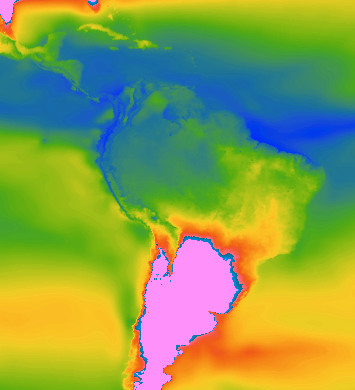

In [55]:
trend_tas_HadGEM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\MOHC-HadGEM2-ES_tas_GenerateTrend.crf", True)
#display the slope band
trend_tas_HadGEM2_band = ExtractBand(trend_tas_HadGEM2, band_ids = [5])
trend_tas_HadGEM2_render = Render(trend_tas_HadGEM2_band, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Voxel Sequential")
trend_tas_HadGEM2_render

In [56]:
# MIROC-MIROC5
with arcpy.EnvManager(scratchWorkspace=data_path_temperature):
    out_multidimensional_raster = arcpy.ia.GenerateTrendRaster(
        in_multidimensional_raster=tas_MIROC5,
        dimension="StdTime", variables="tas", line_type="HARMONIC", frequency=1, ignore_nodata="DATA", 
        cycle_length=30, cycle_unit="DAYS", rmse="RMSE", r2="R2", slope_p_value="NO_SLOPEPVALUE", 
        seasonal_period="")
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\MIROC-MIROC5_tas_GenerateTrend.crf")

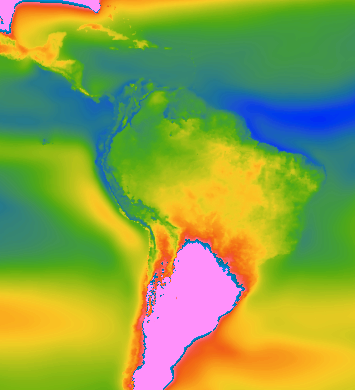

In [57]:
trend_tas_MIROC5 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\MIROC-MIROC5_tas_GenerateTrend.crf", True)
#display the slope band
trend_tas_MIROC5_band = ExtractBand(trend_tas_MIROC5, band_ids = [5])
trend_tas_MIROC5_render = Render(trend_tas_MIROC5_band, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Voxel Sequential")
trend_tas_MIROC5_render

## Predict Using Trend Raster

### Precipitation

In [59]:
# CCCma-CanESM2
with arcpy.EnvManager(scratchWorkspace=data_path_precipitation):
    out_multidimensional_raster = arcpy.ia.PredictUsingTrendRaster(
        in_multidimensional_raster=trend_prcp_CanESM2,
        variables="pr",
        dimension_def="BY_INTERVAL",
        dimension_values=None,
        start="2031-02-01T00:00:00",
        end="2031-12-31T00:00:00",
        interval_value=1,
        interval_unit="MONTHS"
    )
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\CCCma-CanESM2_prcp_GenerateTrend_Predict.crf")

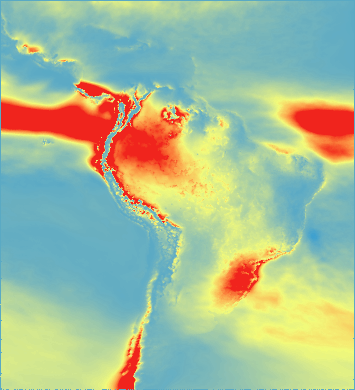

In [61]:
predict_trend_prcp_CanESM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\CCCma-CanESM2_prcp_GenerateTrend_Predict.crf", True)
predict_trend_prcp_CanESM2_render = Render(predict_trend_prcp_CanESM2, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Prediction")
predict_trend_prcp_CanESM2_render

In [62]:
# MOHC-HadGEM2-ES
with arcpy.EnvManager(scratchWorkspace=data_path_precipitation):
    out_multidimensional_raster = arcpy.ia.PredictUsingTrendRaster(
        in_multidimensional_raster=trend_prcp_HadGEM2,
        variables="pr",
        dimension_def="BY_INTERVAL",
        dimension_values=None,
        start="2031-02-01T00:00:00",
        end="2031-12-31T00:00:00",
        interval_value=1,
        interval_unit="MONTHS"
    )
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\MOHC-HadGEM2-ES_prcp_GenerateTrend_Predict.crf")

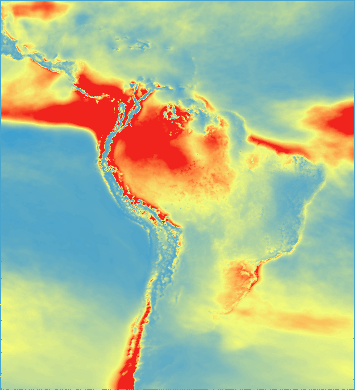

In [63]:
predict_trend_prcp_HadGEM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\MOHC-HadGEM2-ES_prcp_GenerateTrend_Predict.crf", True)
predict_trend_prcp_HadGEM2_render = Render(predict_trend_prcp_HadGEM2, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Prediction")
predict_trend_prcp_HadGEM2_render

In [64]:
# MIROC-MIROC5
with arcpy.EnvManager(scratchWorkspace=data_path_precipitation):
    out_multidimensional_raster = arcpy.ia.PredictUsingTrendRaster(
        in_multidimensional_raster=trend_prcp_MIROC5,
        variables="pr",
        dimension_def="BY_INTERVAL",
        dimension_values=None,
        start="2031-02-01T00:00:00",
        end="2031-12-31T00:00:00",
        interval_value=1,
        interval_unit="MONTHS"
    )
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\MIROC-MIROC5_prcp_GenerateTrend_Predict.crf")

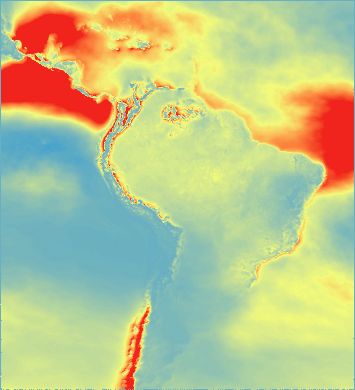

In [65]:
predict_trend_prcp_MIROC5 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\precipitation\MIROC-MIROC5_prcp_GenerateTrend_Predict.crf", True)
predict_trend_prcp_MIROC5_render = Render(predict_trend_prcp_MIROC5, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Prediction")
predict_trend_prcp_MIROC5_render

### Temperature

In [67]:
# CCCma-CanESM2
with arcpy.EnvManager(scratchWorkspace=data_path_temperature):
    out_multidimensional_raster = arcpy.ia.PredictUsingTrendRaster(
        in_multidimensional_raster=trend_tas_CanESM2,
        variables="tas",
        dimension_def="BY_INTERVAL",
        dimension_values=None,
        start="2031-02-01T00:00:00",
        end="2031-12-31T00:00:00",
        interval_value=1,
        interval_unit="MONTHS"
    )
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\CCCma-CanESM2_tas_GenerateTrend_Predict.crf")

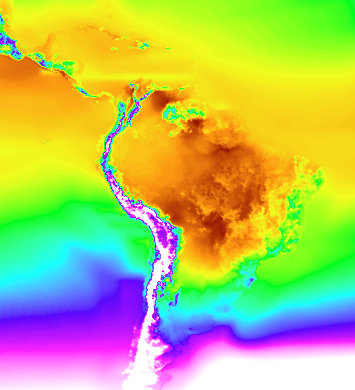

In [69]:
predict_trend_tas_CanESM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\CCCma-CanESM2_tas_GenerateTrend_Predict.crf", True)
predict_trend_tas_CanESM2_render = Render(predict_trend_tas_CanESM2, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Temperature")
predict_trend_tas_CanESM2_render

In [70]:
# MOHC-HadGEM2-ES
with arcpy.EnvManager(scratchWorkspace=data_path_temperature):
    out_multidimensional_raster = arcpy.ia.PredictUsingTrendRaster(
        in_multidimensional_raster=trend_tas_HadGEM2,
        variables="tas",
        dimension_def="BY_INTERVAL",
        dimension_values=None,
        start="2031-02-01T00:00:00",
        end="2031-12-31T00:00:00",
        interval_value=1,
        interval_unit="MONTHS"
    )
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\MOHC-HadGEM2-ES_tas_GenerateTrend_Predict.crf")

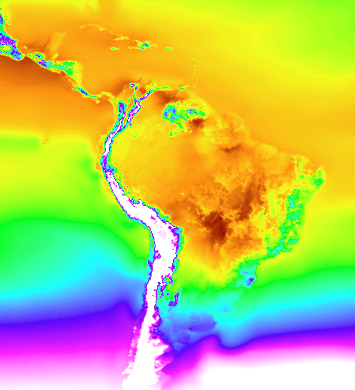

In [71]:
predict_trend_tas_HadGEM2 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\MOHC-HadGEM2-ES_tas_GenerateTrend_Predict.crf", True)
predict_trend_tas_HadGEM2_render = Render(predict_trend_tas_HadGEM2, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Temperature")
predict_trend_tas_HadGEM2_render

In [72]:
# MIROC-MIROC5
with arcpy.EnvManager(scratchWorkspace=data_path_temperature):
    out_multidimensional_raster = arcpy.ia.PredictUsingTrendRaster(
        in_multidimensional_raster=trend_tas_MIROC5,
        variables="tas",
        dimension_def="BY_INTERVAL",
        dimension_values=None,
        start="2031-02-01T00:00:00",
        end="2031-12-31T00:00:00",
        interval_value=1,
        interval_unit="MONTHS"
    )
    out_multidimensional_raster.save(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\MIROC-MIROC5_tas_GenerateTrend_Predict.crf")

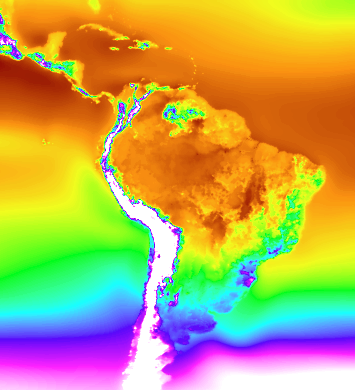

In [73]:
predict_trend_tas_MIROC5 = Raster(r"C:\Users\57320\Dropbox\Mi PC (LAPTOP-5K2HI422)\Documents\ArcGIS for Climate Change\temperature\MIROC-MIROC5_tas_GenerateTrend_Predict.crf", True)
predict_trend_tas_MIROC5_render = Render(predict_trend_tas_MIROC5, rendering_rule={'numberOfStandardDeviations':2, 'DRA':True}, colormap="Temperature")
predict_trend_tas_MIROC5_render